In [1]:
import pandas as pd
import numpy as np

filename = 'BRAZPD_UnofM_all.csv'

df = pd.read_csv(filename, engine='python')


In [2]:
display(df)

,CODPAX,Hemoglobin,Potassium,Phosphate,Mean_PAS_1T,Mean_PAD_1T,Mean_PAS_2T,Mean_PAD_2T,Mean_PAS_3T,Mean_PAD_3T,...,Diastolic70,Systolic71,Diastolic71,Systolic72,Diastolic72,Systolic73,Diastolic73,Systolic74,Diastolic74,_merge
0,1349037,12.933333,4.433333,5.300000,110.500000,70.000000,125.000000,80.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,1349040,14.000000,3.766667,5.933333,129.500000,77.000000,120.333333,68.666667,136.000000,82.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,1349048,11.833333,4.366667,6.100000,158.000000,81.000000,154.666667,87.666667,147.000000,80.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,1349051,10.066667,4.733333,5.533333,140.000000,75.000000,147.333333,92.333333,169.333333,99.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,1349055,11.933333,4.033333,4.066667,103.500000,60.000000,154.666667,82.000000,129.333333,72.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,347457070,8.400000,5.500000,4.700000,126.666667,76.666667,126.666667,83.333333,120.000000,80.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5703,347457071,9.700000,4.300000,3.233333,130.000000,80.000000,113.333333,73.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5704,347457072,10.466667,4.433333,4.466667,136.666667,80.000000,143.333333,73.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5705,347457073,11.766667,4.533333,3.566667,126.666667,80.000000,136.666667,83.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [3]:
# Separate features to unique features and time series features
unique_cols = []
timeseries_cols = []
time_indices = str(np.arange(100))
# print(time_indices)
for col in list(df.columns):
    add = True
    for idx in time_indices:
        if idx in col:
            add = False
    if add == True:
        unique_cols.append(col)
    else:
        timeseries_cols.append(col)
# print(unique_cols)
# print(timeseries_cols)

# Adjust missclassified features
adjlist = ['ModalidadeCAPD0APD1Mix2', 'Dropoutsim1', 'Agedic65', 'Educationdic4y']
for i in range(len(adjlist)):
    unique_cols.append(adjlist[i])
    timeseries_cols.remove(adjlist[i])
# print(unique_cols)
# print(timeseries_cols)

In [11]:
df_selected = df[unique_cols]
# display(df_selected)

Mean_PAS_cols = []
Mean_PAD_cols = []
Followup_cols = []
Group_cols = []
Ureia_cols = []
Creatinine_cols = []
TGP_cols = []
Potassium_cols = []
Calcium_cols = []
Phosphate_cols = []
Glucose_cols = []
Hemoglobin_cols = []
Hematocrit_cols = []
Volume_Total_cols = []
N_AH_cols = []
Phosphate_pre_cols = []
Potassium_pre_cols = []
Ms10ou_cols = []
Systolic_cols = []
Diastolic_cols = []

storage_cols = [Mean_PAS_cols, Mean_PAD_cols, Followup_cols, Group_cols, Ureia_cols, Creatinine_cols, TGP_cols, 
                Potassium_cols, Calcium_cols, Phosphate_cols, Glucose_cols, Hemoglobin_cols, Hematocrit_cols, 
                Volume_Total_cols, N_AH_cols, Phosphate_pre_cols, Potassium_pre_cols, Ms10ou_cols, Systolic_cols, 
                Diastolic_cols]
indices = ['Mean_PAS', 'Mean_PAD', 'Followup', 'Group', 'Ureia', 'Creatinine', 'TGP', 'Potassium', 'Calcium', 
           'Phosphate', 'Glucose', 'Hemoglobin', 'Hematocrit', 'Volume_Total', 'N_AH', 'Phosphate_pre', 
           'Potassium_pre', 'Ms10ou', 'Systolic', 'Diastolic']
for col in timeseries_cols:
    i = 0
    for idx in indices:
        if idx in col:
            storage_cols[i].append(col)
        i = i + 1
# print(storage_cols)

for i in range(len(indices)):
    df_selected.loc[:,indices[i]] = df[storage_cols[i]].mean(axis=1)
    
df_selected = df_selected.fillna(0)
display(df_selected)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,CODPAX,Hemoglobin,Potassium,Phosphate,FRR,codigoclinica,CenterSizenpatients,Followup,ModalidadeDPInicial,Deathevent,...,Calcium,Glucose,Hematocrit,Volume_Total,N_AH,Phosphate_pre,Potassium_pre,Ms10ou,Systolic,Diastolic
0,1349037,11.760000,4.460000,4.740000,0,1,128,4.800000,0.0,1,...,8.280000,119.000000,36.980000,1043.478261,0.000000,0.0,0.0,0.0,117.750000,75.000000
1,1349040,11.838710,3.570968,4.870968,0,1,128,22.133333,0.0,0,...,9.890323,102.548387,35.045161,4521.739130,0.000000,0.0,0.0,0.0,132.166667,77.300000
2,1349048,11.014286,4.600000,7.828571,1,1,128,7.066667,1.0,0,...,9.442857,134.000000,32.628571,1260.869565,0.243243,0.0,0.0,1.0,154.500000,84.166667
3,1349051,10.400000,4.095000,4.785000,1,1,128,17.133334,0.0,1,...,9.180000,283.550000,31.340000,3246.376812,0.297297,0.0,0.0,0.0,159.421053,90.631579
4,1349055,10.725000,4.287500,4.062500,0,1,128,8.666667,0.0,1,...,9.162500,140.000000,33.900000,1623.188406,0.108108,0.0,0.0,0.0,132.375000,73.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,347457070,8.814286,5.214286,5.642857,1,347,66,6.133333,1.0,0,...,9.494286,98.857143,24.714286,49495.166667,0.283784,0.0,0.0,1.0,125.714286,80.000000
5703,347457071,11.383333,4.166667,3.483333,1,347,66,5.100000,1.0,0,...,8.536667,105.500000,35.183333,49328.500000,0.202703,0.0,0.0,1.0,121.666667,76.666667
5704,347457072,12.333333,4.516667,4.633333,1,347,66,5.100000,1.0,0,...,8.950000,215.666667,37.333333,49328.500000,0.243243,0.0,0.0,1.0,140.000000,76.666667
5705,347457073,12.050000,4.433333,3.500000,1,347,66,5.100000,1.0,0,...,9.610000,95.333333,37.733333,49328.500000,0.094595,0.0,0.0,1.0,131.666667,81.666667


<AxesSubplot:ylabel='Frequency'>

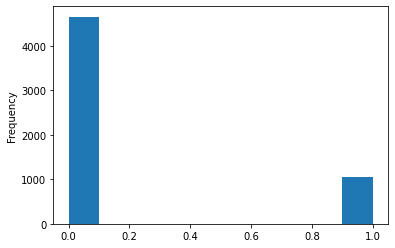

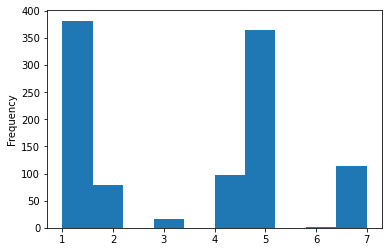

In [5]:
from matplotlib import pyplot as plt

plt.figure()
df_selected['Deathevent'].plot.hist()

plt.figure()
df_selected[df_selected['Deathevent']==1]["Causeofdeath"].plot.hist()

# Predicting binary outcomes:

* Deathevent   
* TechniqueFailureevent

Target: Deathevent, accuracy: 0.8835376532399299


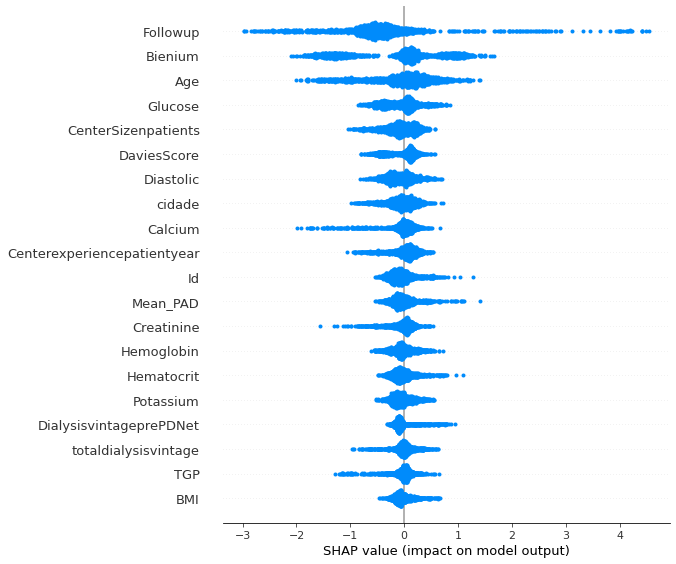

Target: TechniqueFailureevent, accuracy: 0.8852889667250438


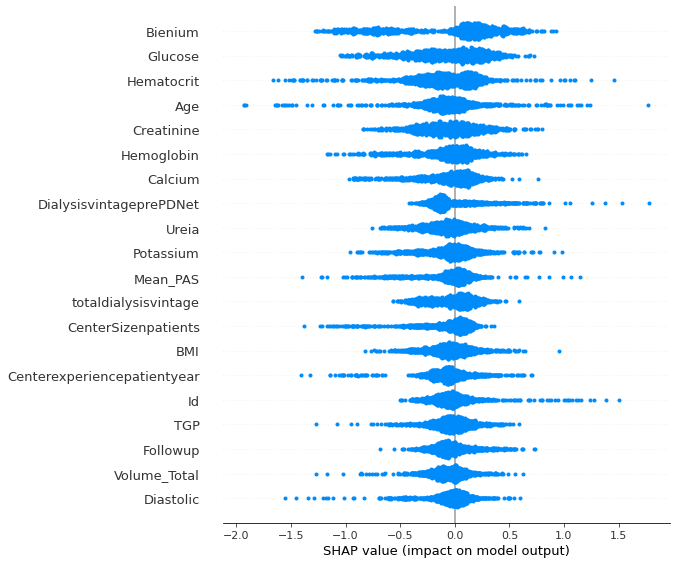

In [10]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score

targets = ["Deathevent","TechniqueFailureevent"]

for target in targets:
    # full dataset
    base_data = df_selected 

    y = base_data[target] 
    X = base_data.drop(columns=['Deathevent', 'Causeofdeath',\
                                'TechniqueFailureevent', 'nome_cidade',\
                                'DataincioPDNEt','TechFailureDeathnotcens',\
                                'CRTechniqueFailure','CRDeath',\
                                'Causeofdropout','Dropoutsim1',\
                                'Anodesada','mesdesaida','anodeentrada',\
                                'CODPAX']) # X is based on patients' personal information

    # Split data into train and test subsets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=True, random_state=None)
    
    # train XGBoost modelm
    model = xgboost.XGBClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    normalised_accuracy = accuracy_score(y_test, y_pred)

    print(f"Target: {target}, accuracy: {normalised_accuracy}")
    
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)

    shap.summary_plot(shap_values, list(X_test.columns))

# Predicting multiclass outcomes:

* Causeofdeath   
* Causeofdropout

Target: Causeofdeath, accuracy: 0.32075471698113206


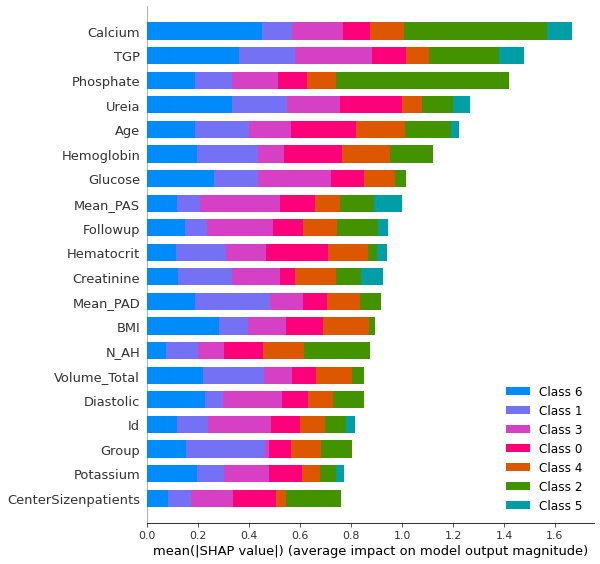

Target: Causeofdropout, accuracy: 0.5690072639225182


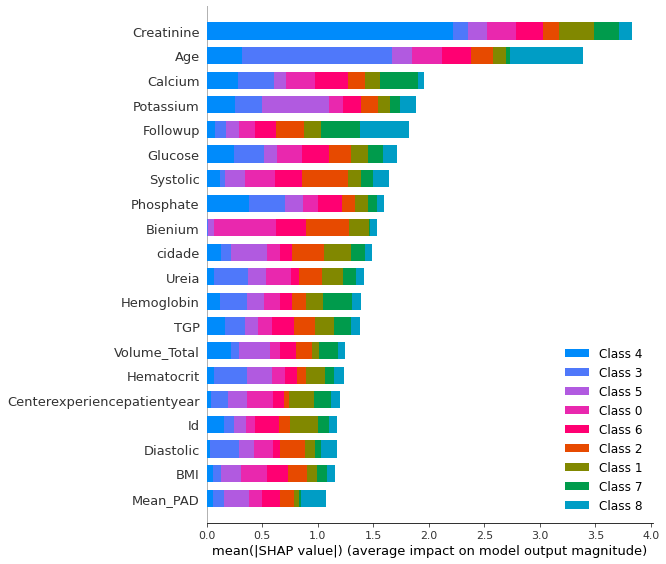

In [9]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score

targets = ["Causeofdeath","Causeofdropout"]
indicators = {"Causeofdeath":"Deathevent","Causeofdropout":"Dropoutsim1"}

for target in targets:
    base_data = df_selected[df_selected[indicators[target]]==1]

    y = base_data[target] 
    X = base_data.drop(columns=['Deathevent', 'Causeofdeath',\
                                'TechniqueFailureevent', 'nome_cidade',\
                                'DataincioPDNEt','TechFailureDeathnotcens',\
                                'CRTechniqueFailure','CRDeath',\
                                'Causeofdropout','Dropoutsim1',\
                                'Anodesada','mesdesaida','anodeentrada',\
                                'CODPAX']) # X is based on patients' personal information

    # Split data into train and test subsets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=True, random_state=None)
    
    # train XGBoost modelm
    model = xgboost.XGBClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    normalised_accuracy = accuracy_score(y_test, y_pred)

    print(f"Target: {target}, accuracy: {normalised_accuracy}")
    
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)

    shap.summary_plot(shap_values, list(X_test.columns))

In [ ]:
# Build an SVM Classifier
from sklearn import svm, metrics

lin_svc = svm.SVC(kernel='linear', decision_function_shape='ovr')
lin_svc.fit(X_train, y_train)
y_pred_lin = lin_svc.predict(X_test)

print('SVM classifier with linear kernel:\n',metrics.classification_report(y_test, y_pred_lin))

In [ ]:
poly_svc = svm.SVC(kernel='poly', degree=3, decision_function_shape='ovr')
poly_svc.fit(X_train, y_train)
y_pred_poly = poly_svc.predict(X_test)


print('SVM classifier with polynomial kernel (d = 3):\n',metrics.classification_report(y_test, y_pred_poly))

In [ ]:
rbf_svc = svm.SVC(kernel='rbf', decision_function_shape='ovr')
rbf_svc.fit(X_train, y_train)
y_pred_rbf = rbf_svc.predict(X_test)


print('SVM classifier with rbf kernel:\n',metrics.classification_report(y_test, y_pred_rbf))

In [ ]:
# Build a KNN Classifier
from sklearn import neighbors, datasets

n_neighbors = 15
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print('KNN classifier with n=15:\n',metrics.classification_report(y_test, y_pred_knn))